In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import multivariate_normal

In [3]:
data = pd.read_csv("github/sensor_data/sensor_data_200.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))

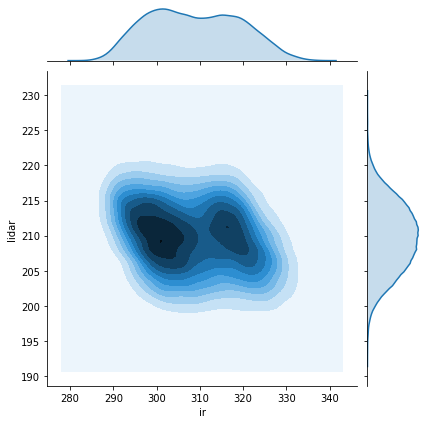

In [4]:
d = data.loc[:, ["ir", "lidar"]]
sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [5]:
d.cov()

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


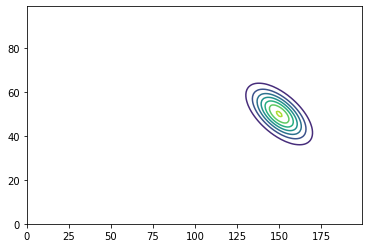

In [8]:
x, y = np.mgrid[0:200, 0:100]
pos=np.empty(x.shape+(2,))
pos[:,:,0]=x
pos[:,:,1]=y
c=multivariate_normal(mean=[150,50], cov=[[100,-25*np.sqrt(3)],[-25*np.sqrt(3), 50]])
plt.contour(x,y,c.pdf(pos))
plt.show()

In [10]:
eig_vals, eig_vecs = np.linalg.eig(c.cov)
print(eig_vals)
print(eig_vecs)

[125.  25.]
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


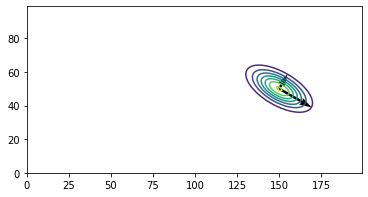

In [14]:
plt.contour(x,y,c.pdf(pos))
v=2*np.sqrt(eig_vals[0])*eig_vecs[:,0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], angles='xy', scale_units='xy', scale=1)
v=2*np.sqrt(eig_vals[1])*eig_vecs[:,1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], angles='xy', scale_units='xy', scale=1)
plt.gca().set_aspect("equal")
plt.show()

<BarContainer object of 40 artists>

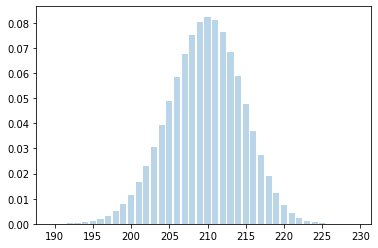

In [22]:
#問題2-3
u=209.7
sig=23.4
p=1-(sig/u)
n=u/p
from scipy.special import comb
def double(x):
    return comb(n, x)*(p**x)*((1-p)**(n-x))
xr=[i for i in range(190,230)]
yr=[double(x) for x in range(190,230)]
plt.bar(xr, yr, alpha=0.3)

<BarContainer object of 40 artists>

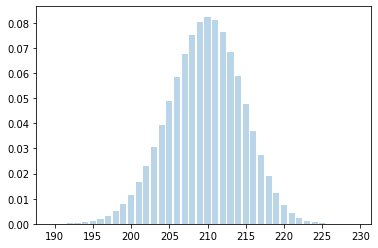

In [ ]:

plt.gca()